# Permutation Flow-Shop Scheduling Problem

This is a variant of the Flow-shop scheduling problem (FSSP) in which the sequence of jobs is the same in every machine and there are assembly operations with arbitrary machine precedences.

$$
 \begin{align}
     \text{min} \quad & C_{\text{max}} \\
     \text{s.t.} \quad & h_{i,k} + \sum_{j \in J} p_{j,i} x_{j,k} \leq h_{j,k}
         & \forall ~ (i,j) \in E; k \in K\\
     & h_{m,k} + \sum_{j \in J} p_{j,m} x_{j,k} \leq h_{m,k+1}
         & \forall ~ m \in M; k \in K \setminus \{|K|\}\\
     & \sum_{j \in J} x_{j,k} = 1
         & \forall ~ k \in K\\
     & \sum_{k \in K} x_{j,k} = 1
         & \forall ~ j \in J\\
     & h_{m,|K|} + \sum_{j \in J} p_{j,m} x_{j,|K|} \leq C_{\text{max}}
         & \forall ~ m \in M\\
     & h_{m,k} \geq 0 & \forall ~ m \in M; k \in K\\
     & x_{j,k} \in \{0, 1\} & \forall ~ j \in J; k \in K\\
 \end{align}
 $$

Where $E$ represents the set of directed edges $(i,j)$ indicating that machine $i$ must precede machine $j$ in the processing sequence.

You can compare this implementation to MILP solvers at the [end of the notebook](#bonus---milp-model).

In [6]:
import gc
import json
import os
import time
from dataclasses import dataclass

from bnbprob.pafssp import CallbackBnB, PermFlowShop, plot_gantt
from bnbprob.pafssp.instances import AssemblyFlowShopInstance
from bnbpy import configure_logfile

In [7]:
configure_logfile("pafssp-experiments.log", mode="w")

In [8]:
gc.disable()

In [9]:
@dataclass
class Experiment:
    name: str
    warmstart: int
    lb1_start: int
    lb5_start: int
    incumbent: int
    lower_bound: int
    execution_time: float
    gap: float
    nodes: int
    sequence: list[int]


def run_experiment(
    name: str, instance: AssemblyFlowShopInstance, timelimit: int = 30
) -> Experiment:
    # Initialization
    problem = PermFlowShop.from_p(instance.p, edges=instance.edges)
    bnb = CallbackBnB(eval_node='in', rtol=0.0001, save_tree=False)
    # Lower bounds and warmstart
    lb1_start = problem.calc_lb_1m()
    lb5_start = problem.calc_lb_2m()
    warmstart = problem.warmstart().calc_lb_1m()
    # Solve
    start_time = time.time()
    sol = bnb.solve(problem, maxiter=100_000_000, timelimit=timelimit)
    execution_time = time.time() - start_time
    # Results
    sequence_jobs = sol.problem.sequence
    sequence = [job.j for job in sequence_jobs] if sequence_jobs else []
    experiment = Experiment(
        name,
        warmstart,
        lb1_start,
        lb5_start,
        bnb.ub,
        bnb.lb,
        execution_time,
        bnb.gap,
        bnb.explored,
        sequence,
    )
    gc.collect()
    time.sleep(0.2)
    return experiment

## DPm -> Fm || Cmax

In [10]:
experiments = list[Experiment]()

input_path = './../data/pafssp/dpm'
# Scan directory for all instances
for file in os.listdir(input_path):
    if not file.endswith('.json'):
        continue
    name = file[:-5]
    idx = int(name[4:7])
    if not (11 <= idx <= 20):
        continue
    with open(os.path.join(input_path, file), 'r', encoding='utf8') as f:
        data = json.load(f)
    instance = AssemblyFlowShopInstance(data["p"], data["edges"])
    experiment = run_experiment(name, instance, timelimit=3600)
    experiments.append(experiment)
    print(experiment)


Experiment(name='dpm-011-20-5x9', warmstart=1709, lb1_start=1494, lb5_start=1547, incumbent=1649.0, lower_bound=1649.0, execution_time=3.204188346862793, gap=0.0, nodes=46973, sequence=[4, 14, 6, 12, 1, 19, 3, 9, 15, 2, 16, 18, 17, 0, 5, 11, 10, 7, 13, 8])
Experiment(name='dpm-012-20-5x9', warmstart=1764, lb1_start=1486, lb5_start=1689, incumbent=1715.0, lower_bound=1708.0, execution_time=3600.0013465881348, gap=0.004081632653061225, nodes=33955260, sequence=[7, 18, 5, 8, 9, 4, 16, 13, 3, 11, 10, 6, 0, 17, 14, 2, 1, 12, 15, 19])
Experiment(name='dpm-013-20-5x9', warmstart=1733, lb1_start=1514, lb5_start=1532, incumbent=1637.0, lower_bound=1637.0, execution_time=74.48087215423584, gap=0.0, nodes=988335, sequence=[6, 14, 9, 2, 7, 13, 5, 0, 17, 4, 1, 8, 12, 10, 15, 18, 16, 11, 3, 19])
Experiment(name='dpm-014-20-5x9', warmstart=1741, lb1_start=1519, lb5_start=1571, incumbent=1645.0, lower_bound=1645.0, execution_time=22.722219228744507, gap=0.0, nodes=364345, sequence=[10, 1, 18, 5, 6, 19

In [11]:
experiments = list[Experiment]()

input_path = './../data/pafssp/dpm'
# Scan directory for all instances
for file in os.listdir(input_path):
    if not file.endswith('.json'):
        continue
    name = file[:-5]
    idx = int(name[4:7])
    if not (41 <= idx <= 50):
        continue
    with open(os.path.join(input_path, file), 'r', encoding='utf8') as f:
        data = json.load(f)
    instance = AssemblyFlowShopInstance(data["p"], data["edges"])
    experiment = run_experiment(name, instance, timelimit=3600)
    experiments.append(experiment)
    print(experiment)

Experiment(name='dpm-041-50-5x9', warmstart=3495, lb1_start=3424, lb5_start=3424, incumbent=3424.0, lower_bound=3424.0, execution_time=9.054025173187256, gap=0.0, nodes=30751, sequence=[46, 19, 29, 30, 7, 1, 13, 21, 38, 31, 25, 15, 36, 12, 45, 5, 32, 33, 42, 14, 34, 18, 6, 2, 41, 27, 48, 0, 11, 10, 43, 39, 17, 23, 49, 20, 37, 22, 28, 40, 24, 4, 47, 26, 9, 8, 44, 16, 35, 3])
Experiment(name='dpm-042-50-5x9', warmstart=3229, lb1_start=2920, lb5_start=2989, incumbent=3037.0, lower_bound=3037.0, execution_time=2914.4309010505676, gap=0.0, nodes=17035265, sequence=[40, 10, 24, 4, 20, 16, 18, 38, 46, 34, 19, 43, 11, 8, 39, 2, 25, 35, 32, 9, 45, 30, 37, 12, 48, 28, 3, 14, 44, 29, 22, 1, 49, 0, 7, 5, 42, 27, 36, 47, 6, 21, 13, 23, 26, 41, 17, 15, 31, 33])
Experiment(name='dpm-043-50-5x9', warmstart=3139, lb1_start=3066, lb5_start=3066, incumbent=3080.0, lower_bound=3080.0, execution_time=168.6261157989502, gap=0.0, nodes=1045306, sequence=[0, 49, 10, 17, 7, 38, 40, 25, 37, 34, 29, 14, 30, 4, 1

In [42]:
experiment

Experiment(name='dpm-20-3x6-023', warmstart=1601, lb1_start=1424, lb5_start=1449, incumbent=1500.0, lower_bound=1500.0, execution_time=0.6019561290740967, gap=0.0, nodes=12277, sequence=[10, 15, 12, 14, 17, 8, 18, 0, 16, 3, 11, 9, 13, 7, 6, 2, 5, 1, 4, 19])

In [27]:
problem = PermFlowShop.from_p(instance.p, edges=instance.edges)
bnb = CallbackBnB(eval_node="in", rtol=0.0001, save_tree=False)

In [28]:
print(problem.warmstart().calc_lb_1m())
sol = bnb.solve(problem, maxiter=10_000_000, timelimit=30)
print(sol)

1721
Status: OPTIMAL | Cost: 1672.0 | LB: 1672.0


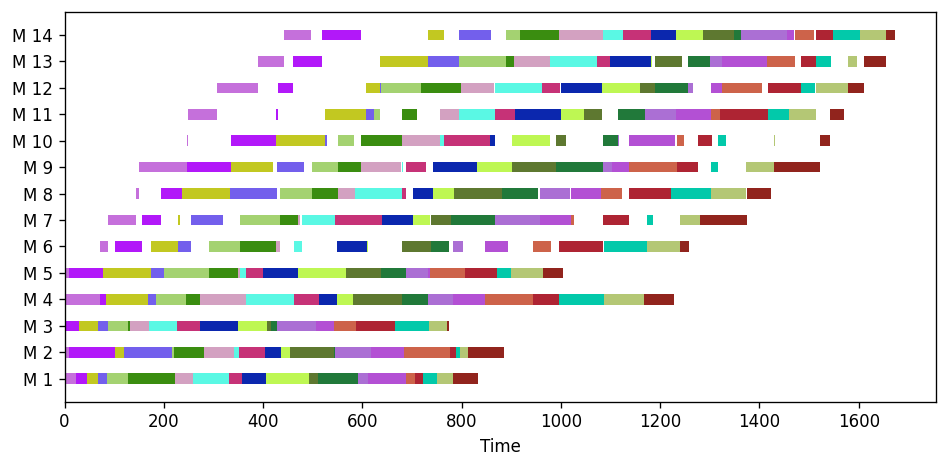

In [23]:
plot_gantt(sol.problem.sequence, dpi=120, seed=42, figsize=[8, 4])

## Parallel Semilines Layout

In [12]:
with open(
    './../data/pafssp/d2f/2f-20-10x10-022.json', 'r', encoding='utf8'
) as f:
    data = json.load(f)


instance = AssemblyFlowShopInstance(data["p"], data["edges"])

In [16]:
problem = PermFlowShop.from_p(instance.p, edges=instance.edges)
bnb = CallbackBnB(eval_node="in", rtol=0.0001, save_tree=False)

In [17]:
sol = bnb.solve(problem, maxiter=10_000_000, timelimit=30)
print(sol)

Status: OPTIMAL | Cost: 1703.0 | LB: 1703.0


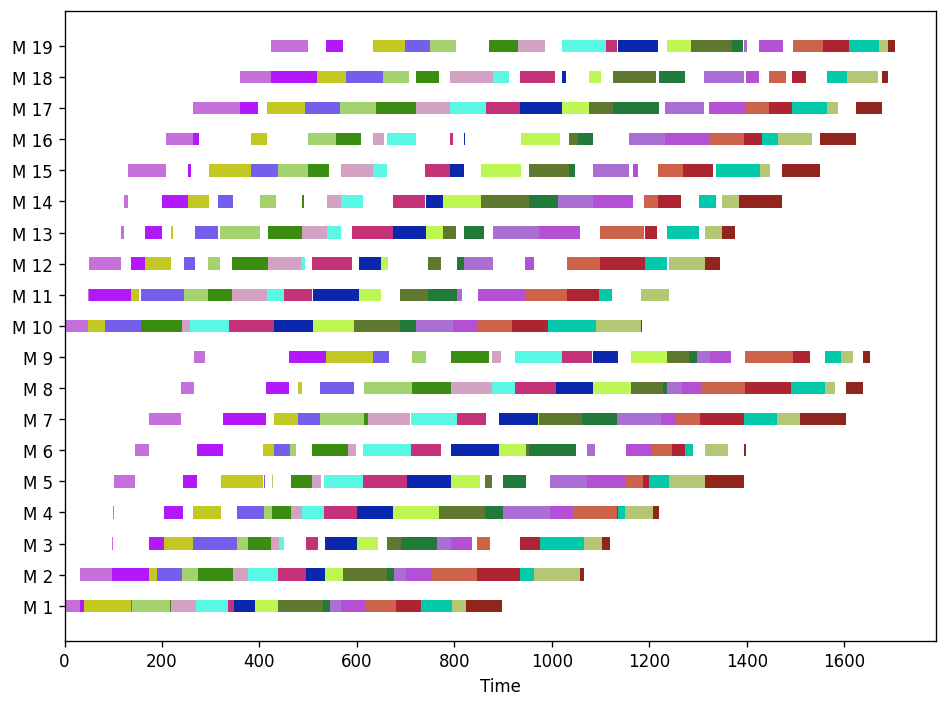

In [19]:
plot_gantt(sol.problem.sequence, dpi=120, seed=42, figsize=[8, 6])

In this implmentation lower bounds are computed by
the max of a single machine and
a two machine relaxations.

The bounds for single and two-machine problems are described
by Potts (1980), also implemented by Ladhari & Haouari (2005),
therein described as 'LB1' and 'LB5'.

If the attribute `constructive` is 'neh', the heuristic
of Nawaz et al. (1983) is adopted, otherwise
the strategy by Palmer (1965).


## References

Ladhari, T., & Haouari, M. (2005). A computational study of
the permutation flow shop problem based on a tight lower bound.
Computers & Operations Research, 32(7), 1831-1847.

Nawaz, M., Enscore Jr, E. E., & Ham, I. (1983).
A heuristic algorithm for the m-machine,
n-job flow-shop sequencing problem.
Omega, 11(1), 91-95.

Potts, C. N. (1980). An adaptive branching rule for the permutation
flow-shop problem. European Journal of Operational Research, 5(1), 19-25.

Palmer, D. S. (1965). Sequencing jobs through a multi-stage process
in the minimum total time—a quick method of obtaining a near optimum.
Journal of the Operational Research Society, 16(1), 101-107

## Bonus - MILP Model

This is the usual Position-based MILP model as an alternative to compare performance.


```python
import pyomo.environ as pyo

from bnbprob.pfssp.mip import positional_model

model = positional_model(p)


# HiGHS
solver = pyo.SolverFactory("appsi_highs")
solver.options["mip_heuristic_effort"] = 0.1
solver.options["time_limit"] = 120
solver.options["log_file"] = "Highs.log"
solver.solve(model, tee=True)

# Gurobi
solver = pyo.SolverFactory("gurobi", solver_io="python")
solver.options["Heuristics"] = 0.2
solver.options["Cuts"] = 2
solver.options["TimeLimit"] = 120
solver.solve(model, tee=True)
```